In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import yfinance as yf

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline


In [219]:
ticker = "AAPL"

df = yf.download(ticker, period="10y", interval="1d")
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)
df.tail()

C:\Users\CALVIN\AppData\Local\Temp\ipykernel_25644\2062440160.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="10y", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-11-17,267.459991,270.489990,265.730011,268.820007,45018300
2025-11-18,267.440002,270.709991,265.320007,269.989990,45677300
2025-11-19,268.559998,272.209991,265.500000,265.529999,40424500
2025-11-20,266.250000,275.429993,265.920013,270.829987,45823600
2025-11-21,271.489990,273.329987,265.670013,265.950012,58784100


In [220]:
weekly_df = df.resample('W').mean()

In [221]:
weekly_df['TimeStep'] = np.arange(len(weekly_df))

In [222]:
X = weekly_df['TimeStep'].values
y = weekly_df['Close'].values

In [223]:
polynomial_converter = PolynomialFeatures(degree=2)
polynomial_converter.fit(X.reshape(-1, 1))
poly_features = polynomial_converter.transform(X.reshape(-1, 1))

In [224]:
split_point = int(len(X) * 0.8)

X_train = X[:split_point].reshape(-1, 1)
y_train = y[:split_point]

X_test = X[split_point:].reshape(-1, 1)
y_test = y[split_point:]

In [225]:
model = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    Ridge(alpha=1)
)

model.fit(X_train, y_train)

,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [226]:
predictions = model.predict(X_test)
y_test[:5], predictions[:5]

(array([[189.05705643],
        [188.37102661],
        [191.22409363],
        [194.46944885],
        [193.36190796]]),
 array([188.51235553, 189.04283962, 189.57266292, 190.10181647,
        190.63029131]))

In [227]:
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
MAE, MSE, RMSE

(16.604210837769873, 371.95042664425506, np.float64(19.286016349787094))

In [228]:
residuals = y_test - predictions

ValueError: x and y must be the same size

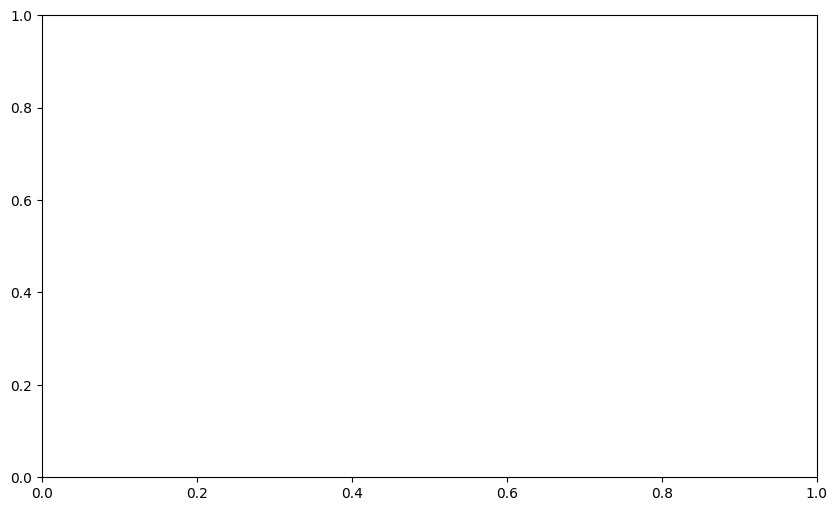

In [229]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals[:split_point], alpha=0.5, color='purple')
plt.axhline(y=0, color='r', linestyle='--') # The "Zero Error" Line
plt.xlabel('Actual Apple Price')
plt.ylabel('Residual Error ($)')
plt.title('Residual Plot: Are errors random or patterned?')
plt.show()

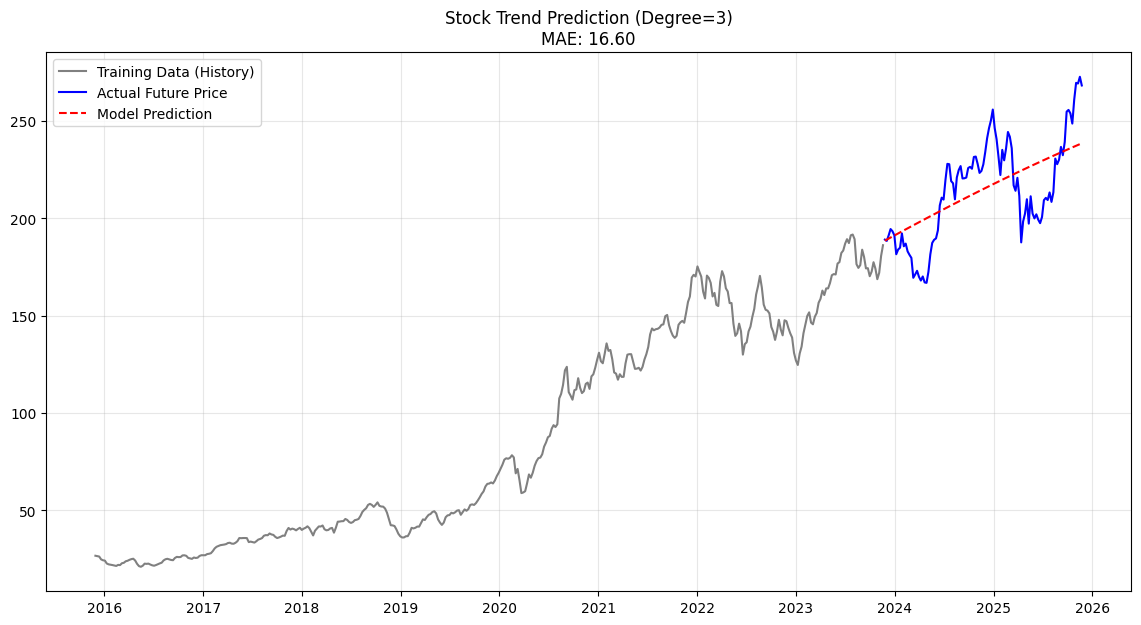

In [213]:
plt.figure(figsize=(14, 7))

plt.plot(weekly_df.index[:split_point], y_train, label='Training Data (History)', color='gray')
plt.plot(weekly_df.index[split_point:], y_test, label='Actual Future Price', color='blue')

plt.plot(weekly_df.index[split_point:], predictions, label='Model Prediction', color='red', linestyle='--')

plt.title(f"Stock Trend Prediction (Degree=3)\nMAE: {mean_absolute_error(y_test, predictions):.2f}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()